# Install Required Libraries
Install the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [1]:
%pip install seaborn matplotlib pandas numpy scipy

Note: you may need to restart the kernel to use updated packages.


# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure the default style of the plots
sns.set(style="whitegrid")

# Load the Dataset
Load the dataset into a pandas DataFrame.

In [3]:
# Load the Dataset
# Load the dataset into a pandas DataFrame
df = pd.read_csv("Advertising.csv")

# Display the first few rows of the DataFrame
df.head()

,id,Online,TV,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Explore the Dataset
Perform exploratory data analysis (EDA) to understand the dataset, including checking for missing values and visualizing the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         200 non-null    int64  
 1   Online     200 non-null    float64
 2   TV         200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
Missing values in each column:
 id           0
Online       0
TV           0
newspaper    0
sales        0
dtype: int64


<Figure size 1200x800 with 0 Axes>

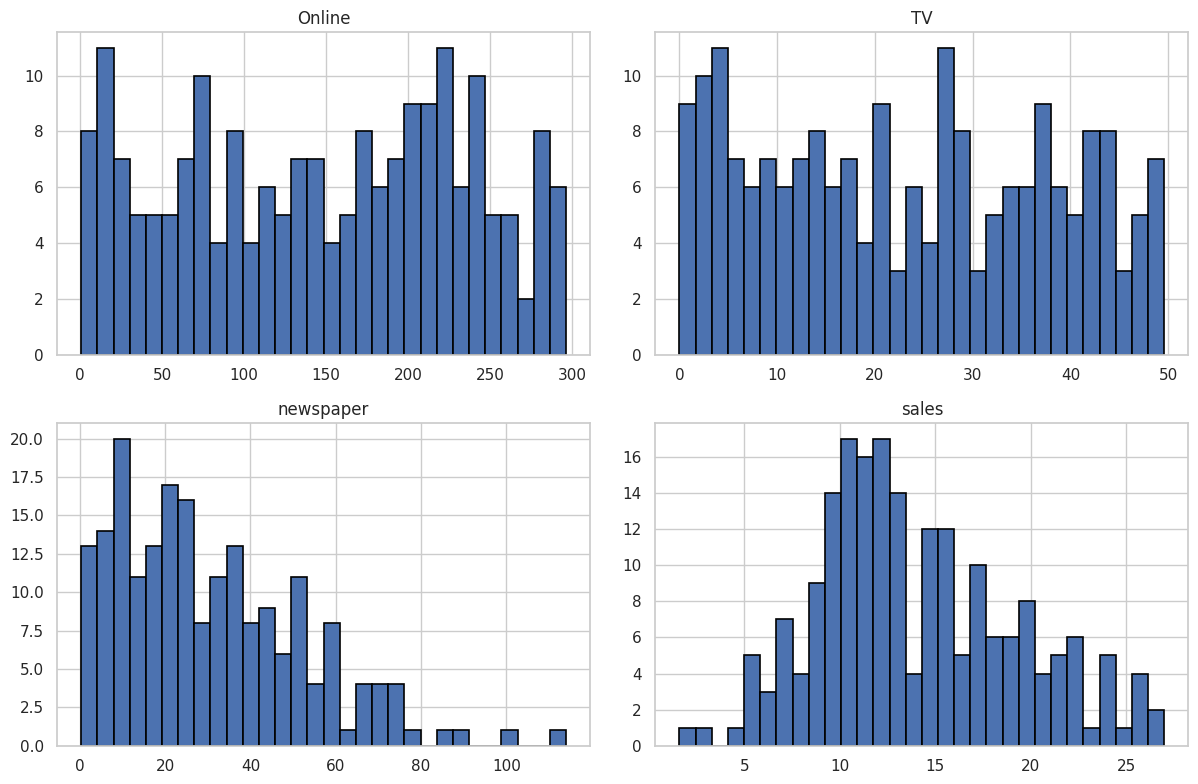

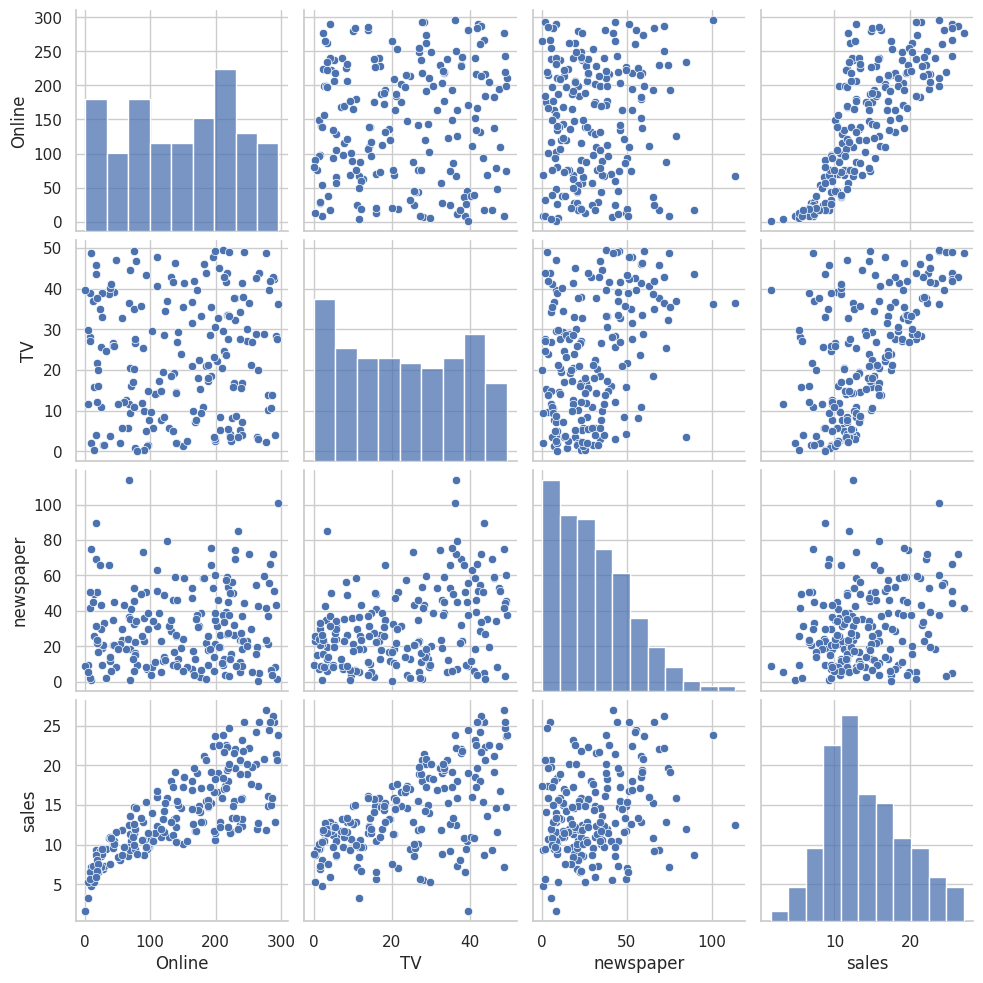

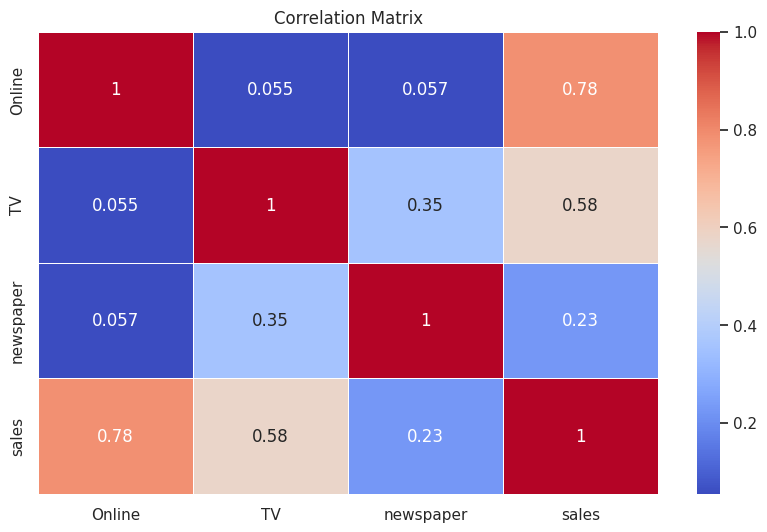

In [4]:
# Explore the Dataset

# Display basic information about the DataFrame
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# id columns nas no use
df.drop('id', axis=1, inplace=True)

# Summary statistics of the DataFrame
df.describe()

# Visualize the distribution of each feature
plt.figure(figsize=(12, 8))
df.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Visualize the relationships between features using pairplot
sns.pairplot(df)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Preprocess the Data (Optional Step)
Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features if necessary.

In [5]:
df.head()

,Online,TV,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:

# Scale numerical features
from sklearn.preprocessing import StandardScaler

# Assuming 'Sales' is the target variable and the rest are features
features = df.drop('sales', axis=1)
target = df['sales']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Combine the scaled features with the target variable
preprocessed_df = pd.concat([scaled_features_df, target.reset_index(drop=True)], axis=1)

# Display the first few rows of the preprocessed DataFrame
preprocessed_df.head()

,Online,TV,newspaper,sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9


# Split the Data into Training and Testing Sets
Split the dataset into training and testing sets using train_test_split from sklearn.model_selection.

In [7]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = preprocessed_df.drop('sales', axis=1)
y = preprocessed_df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


# Build the Regression Model
Build the regression model using a suitable algorithm from sklearn, such as LinearRegression.

In [8]:
# Build the Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

# Evaluate the Model
Evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

Mean Absolute Error (MAE): 1.4607567168117601
Mean Squared Error (MSE): 3.1740973539761064
R-squared: 0.8994380241009119


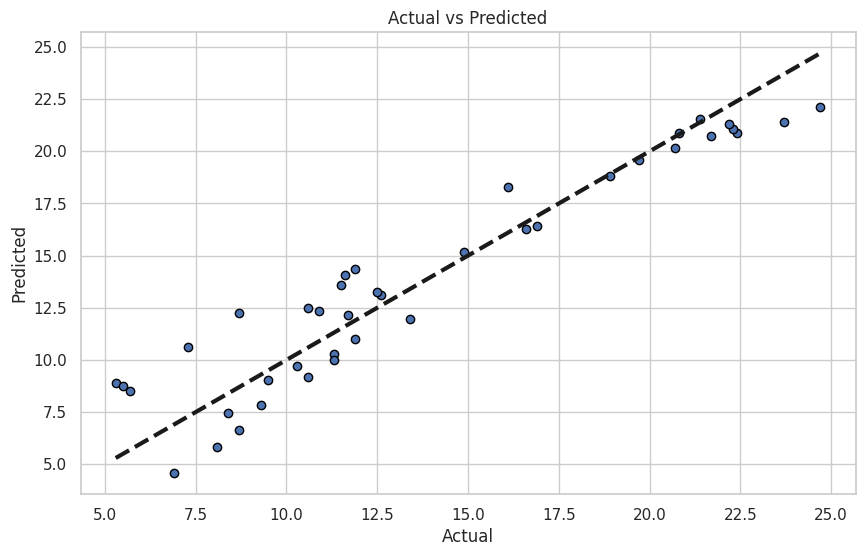

In [9]:
# Evaluate the Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

     Feature  Importance
0     Online    3.830606
1         TV    2.801912
2  newspaper    0.059983


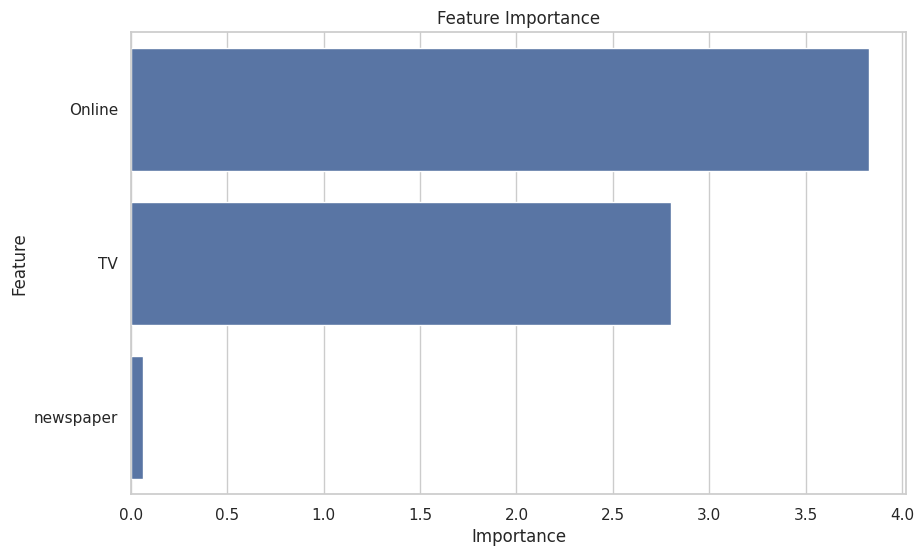

In [10]:
# Get the coefficients of the linear regression model
coefficients = model.coef_

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()